## Neural Network Model

In [38]:
import numpy as np
import joblib
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [39]:
# Load Preprocessed Data
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test  = pd.read_csv("../data/processed/y_test.csv")

y_train = y_train.squeeze()
y_test  = y_test.squeeze()


In [40]:
# Initialize Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=1000, verbose=True)


In [41]:
# Evaluation before tuning

nn_default = MLPClassifier(random_state=42, max_iter=1000, verbose=True)
nn_default.fit(X_train, y_train)

y_pred_default = nn_default.predict(X_test)
y_proba_default = nn_default.predict_proba(X_test)[:, 1]

print("=== Neural Network - BEFORE TUNING ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:\n", classification_report(y_test, y_pred_default))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_default))

Iteration 1, loss = 0.52425348
Iteration 2, loss = 0.42790289
Iteration 3, loss = 0.41685059
Iteration 4, loss = 0.41354273
Iteration 5, loss = 0.41114723
Iteration 6, loss = 0.40927242
Iteration 7, loss = 0.40826313
Iteration 8, loss = 0.40686891
Iteration 9, loss = 0.40695713
Iteration 10, loss = 0.40578096
Iteration 11, loss = 0.40484016
Iteration 12, loss = 0.40525508
Iteration 13, loss = 0.40406679
Iteration 14, loss = 0.40268250
Iteration 15, loss = 0.40186179
Iteration 16, loss = 0.40083471
Iteration 17, loss = 0.40082711
Iteration 18, loss = 0.40081242
Iteration 19, loss = 0.39865411
Iteration 20, loss = 0.39777526
Iteration 21, loss = 0.39890655
Iteration 22, loss = 0.39645474
Iteration 23, loss = 0.39489545
Iteration 24, loss = 0.39478620
Iteration 25, loss = 0.39464471
Iteration 26, loss = 0.39421431
Iteration 27, loss = 0.39279032
Iteration 28, loss = 0.39179421
Iteration 29, loss = 0.39154641
Iteration 30, loss = 0.39017989
Iteration 31, loss = 0.38872176
Iteration 32, los

In [42]:
# Hyperparameter Tuning 
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
grid_search = GridSearchCV(nn_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Iteration 1, loss = 0.64393518
Iteration 2, loss = 0.55222115
Iteration 3, loss = 0.50960787
Iteration 4, loss = 0.48401512
Iteration 5, loss = 0.46733025
Iteration 6, loss = 0.45603499
Iteration 7, loss = 0.44770957
Iteration 8, loss = 0.44173472
Iteration 9, loss = 0.43720630
Iteration 10, loss = 0.43380504
Iteration 11, loss = 0.43092360
Iteration 12, loss = 0.42885586
Iteration 13, loss = 0.42671030
Iteration 14, loss = 0.42541240
Iteration 15, loss = 0.42399033
Iteration 16, loss = 0.42297414
Iteration 17, loss = 0.42197665
Iteration 18, loss = 0.42112876
Iteration 19, loss = 0.42038499
Iteration 20, loss = 0.41985225
Iteration 21, loss = 0.41924085
Iteration 22, loss = 0.41880906
Iteration 23, loss = 0.41832070
Iteration 24, loss = 0.41791515
Iteration 25, loss = 0.41757176
Iteration 26, loss = 0.41721063
Iteration 27, loss = 0.41694584
Iteration 28, loss = 0.41665779
Iteration 29, loss = 0.41641935
Iteration 30, loss = 0.41615354
Iteration 31, loss = 0.41588683
Iteration 32, los

In [43]:
# Train Final Model
best_nn = grid_search.best_estimator_
best_nn.set_params(verbose=True)
best_nn.fit(X_train, y_train)

Iteration 1, loss = 0.64393518
Iteration 2, loss = 0.55222115
Iteration 3, loss = 0.50960787
Iteration 4, loss = 0.48401512
Iteration 5, loss = 0.46733025
Iteration 6, loss = 0.45603499
Iteration 7, loss = 0.44770957
Iteration 8, loss = 0.44173472
Iteration 9, loss = 0.43720630
Iteration 10, loss = 0.43380504
Iteration 11, loss = 0.43092360
Iteration 12, loss = 0.42885586
Iteration 13, loss = 0.42671030
Iteration 14, loss = 0.42541240
Iteration 15, loss = 0.42399033
Iteration 16, loss = 0.42297414
Iteration 17, loss = 0.42197665
Iteration 18, loss = 0.42112876
Iteration 19, loss = 0.42038499
Iteration 20, loss = 0.41985225
Iteration 21, loss = 0.41924085
Iteration 22, loss = 0.41880906
Iteration 23, loss = 0.41832070
Iteration 24, loss = 0.41791515
Iteration 25, loss = 0.41757176
Iteration 26, loss = 0.41721063
Iteration 27, loss = 0.41694584
Iteration 28, loss = 0.41665779
Iteration 29, loss = 0.41641935
Iteration 30, loss = 0.41615354
Iteration 31, loss = 0.41588683
Iteration 32, los

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'sgd'
,alpha,0.001
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [44]:
# Evaluate Model after tuning
y_pred = best_nn.predict(X_test)
y_proba = best_nn.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.801277501774308

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[935 100]
 [180 194]]

ROC-AUC Score: 0.8410731354465371


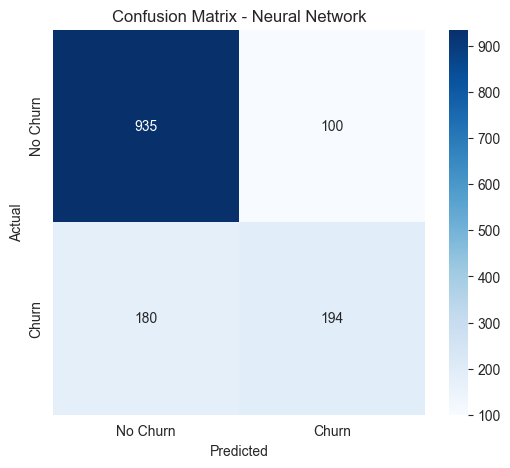

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.savefig("../results/nn_confusion_matrix.png") 
plt.show()


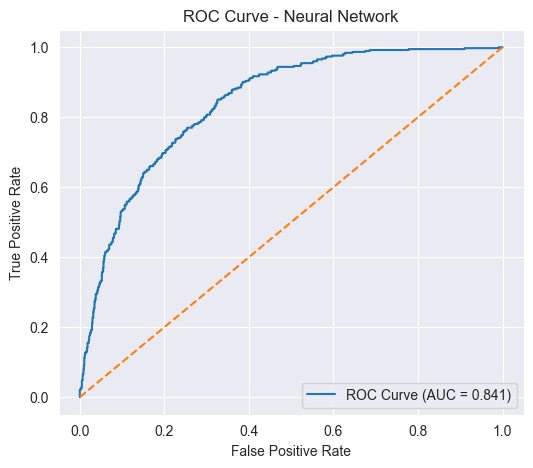

In [53]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("../results/nn_confusion_matrix.png") 
plt.show()


In [47]:
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,50),
    max_iter=1000,
    random_state=42,
    verbose=False,
    early_stopping=True,    # ✅ enables internal validation set
    validation_fraction=0.2
)
nn_model.fit(X_train, y_train)

# Train accuracy (on final training set)
train_acc = nn_model.score(X_train, y_train)

# Validation accuracy (on the held-out internal validation set)
val_acc = nn_model.best_validation_score_

print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


Train Accuracy: 0.8141640042598509
Validation Accuracy: 0.8189884649511979


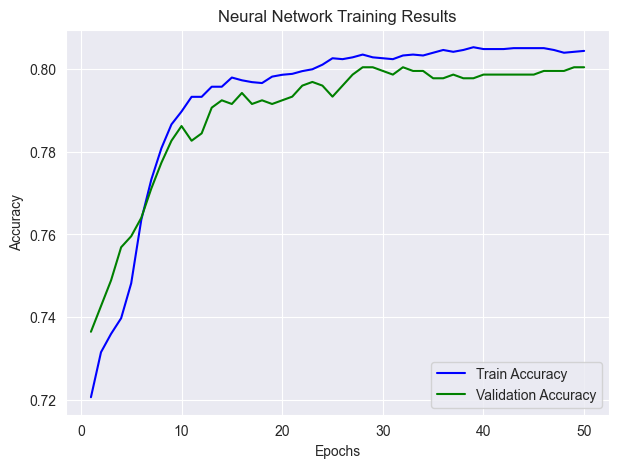

In [49]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split training data into train + validation for plotting
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Initialize model for manual epoch tracking
nn_epoch_model = MLPClassifier(
    hidden_layer_sizes=best_nn.hidden_layer_sizes,  # use best hyperparams
    activation=best_nn.activation,
    solver=best_nn.solver,
    alpha=best_nn.alpha,
    learning_rate=best_nn.learning_rate,
    max_iter=1,           # 1 iteration per loop
    warm_start=True,      # continue training
    random_state=42
)

# Track accuracy per epoch
epochs = 50
train_acc_list = []
val_acc_list = []

for epoch in range(epochs):
    nn_epoch_model.fit(X_train_part, y_train_part)
    train_acc_list.append(nn_epoch_model.score(X_train_part, y_train_part))
    val_acc_list.append(nn_epoch_model.score(X_val, y_val))

# Plot the training graph
plt.figure(figsize=(7,5))
plt.plot(range(1, epochs+1), train_acc_list, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs+1), val_acc_list, label="Validation Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network Training Results")
plt.legend()
plt.grid(True)
plt.savefig("../results/nn_training_results.png") 
plt.show()


In [50]:
# Save Model
import os

models_path = os.path.abspath(os.path.join('..', 'models'))
os.makedirs(models_path, exist_ok=True)

joblib.dump(best_nn, os.path.join(models_path, 'neural_network_model.joblib'))
print("Neural Network model saved!")

Neural Network model saved!
